<a href="https://colab.research.google.com/github/prievarag/Employee-Attrition/blob/main/Employee_attrition_PG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Employee attrition prediction

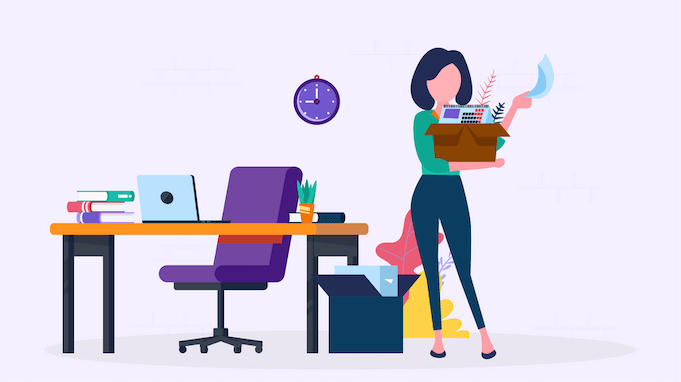

In my current workplace - food industry - one of my first tasks was to analyze employee turnover. I created lots of tables and graphs, and we drew several conclusions from that analysis.

At the time, and ever since, this question was of central importance.

Now I have a dataset from Kaggle, I will analyze it and predict whether an employee will leave the company in the future or not.

In this dataset we have several features as columns relevant to the investigation of labor turnover:
*   Education : The highest level of formal education obtained by the employee
*   JoiningYear : Year of joining the company
*   City : Job Location
*   PaymentTier : [1:3] -> 1 means better payment
*   Age : Age of the employee
*   Gender : Gender of the employee
*   EverBenched : Ever kept out of project for more than one month
*   ExperienceInCurrentDomain : Experience in current field
*   LeaveOrNot : Whether the employee leaves the company in next 2 years




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
#let's see how many data we have
df.shape

(4653, 9)

In [ ]:
df.duplicated().sum()

1889

As we see the features, there is no reason to remove duplicates because they can be different employees.

In [ ]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [ ]:
df.select_dtypes(include="object").nunique()

Education      3
City           3
Gender         2
EverBenched    2
dtype: int64

So we have 3 education level, 3 city, 2 gender and 2 of the category EverBenched.

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

## Data Visualization
We can see better the correlation between feature and target.

<Axes: xlabel='Gender', ylabel='count'>

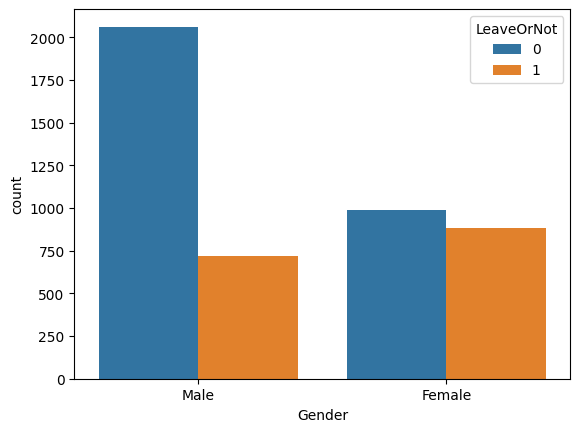

In [ ]:
sns.countplot(data = df, x="Gender", hue="LeaveOrNot")

<Axes: xlabel='City', ylabel='count'>

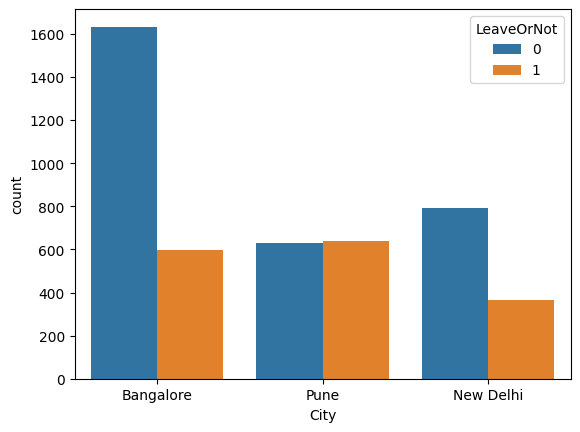

In [ ]:
sns.countplot(data = df, x="City", hue="LeaveOrNot")

<Axes: xlabel='JoiningYear', ylabel='count'>

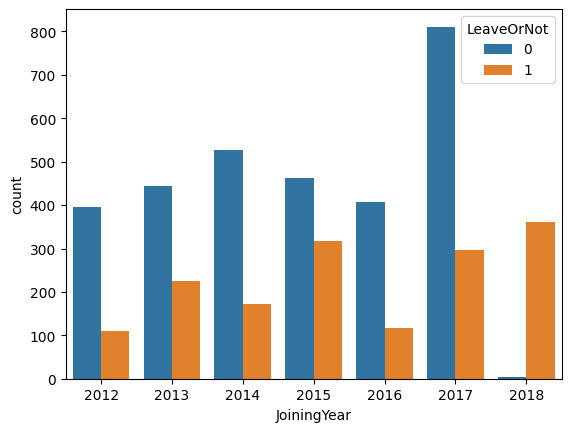

In [ ]:
sns.countplot(data = df, x="JoiningYear", hue="LeaveOrNot")

<Axes: xlabel='EverBenched', ylabel='count'>

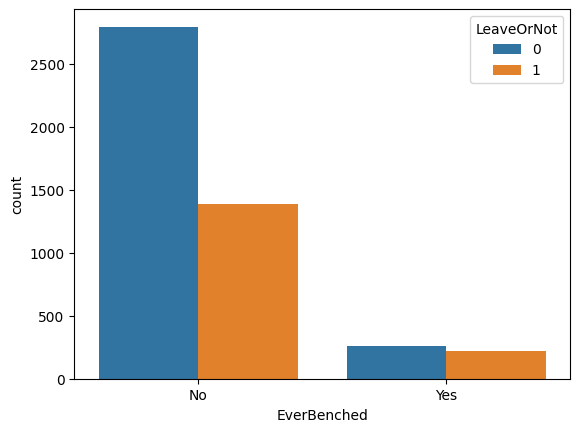

In [ ]:
sns.countplot(data = df, x="EverBenched", hue="LeaveOrNot")

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

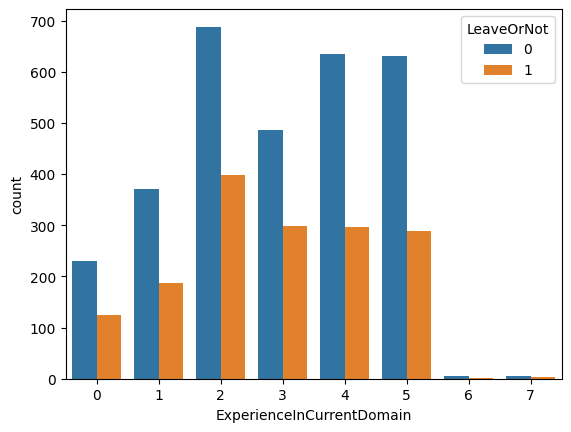

In [ ]:
sns.countplot(data = df, x="ExperienceInCurrentDomain", hue="LeaveOrNot")

As we can see, about 50% leaves the company in each category. The company has only a few employee with 6 or 7 years of experience. Personally I think it is useful to keep employees with several years of experience because their replacement is more difficult to solve.of course, it is also possible that the company is young and the number of employees was very low 6-7 years ago.

In [ ]:
df_gender = df.Gender.value_counts()

<Axes: ylabel='Gender'>

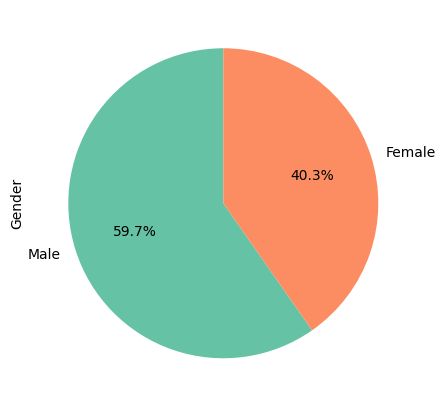

In [ ]:
df_gender.plot(kind="pie",
               figsize = (5, 6),      #size of the graph
               autopct = '%1.1f%%',   #add data in percentages
               startangle = 90,       #rotation starting position
               colors=sns.color_palette('Set2'),
               #shadow = True          #maybe not a good idea
)

##Data Preprocessing

In [ ]:
#Checking null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

##Data encoding

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Education', 'City', 'Gender', 'EverBenched'])
print(one_hot_encoded_data)

      JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0            2017            3   34                          0           0   
1            2013            1   28                          3           1   
2            2014            3   38                          2           0   
3            2016            3   27                          5           1   
4            2017            3   24                          2           1   
...           ...          ...  ...                        ...         ...   
4648         2013            3   26                          4           0   
4649         2013            2   37                          2           1   
4650         2018            3   27                          5           1   
4651         2012            3   30                          2           0   
4652         2015            3   33                          4           0   

      Education_Bachelors  Education_Masters  Education_PHD  Ci

In [ ]:
one_hot_encoded_data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1


<ipython-input-19-1f10177feda6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2g', annot=True)


<Axes: >

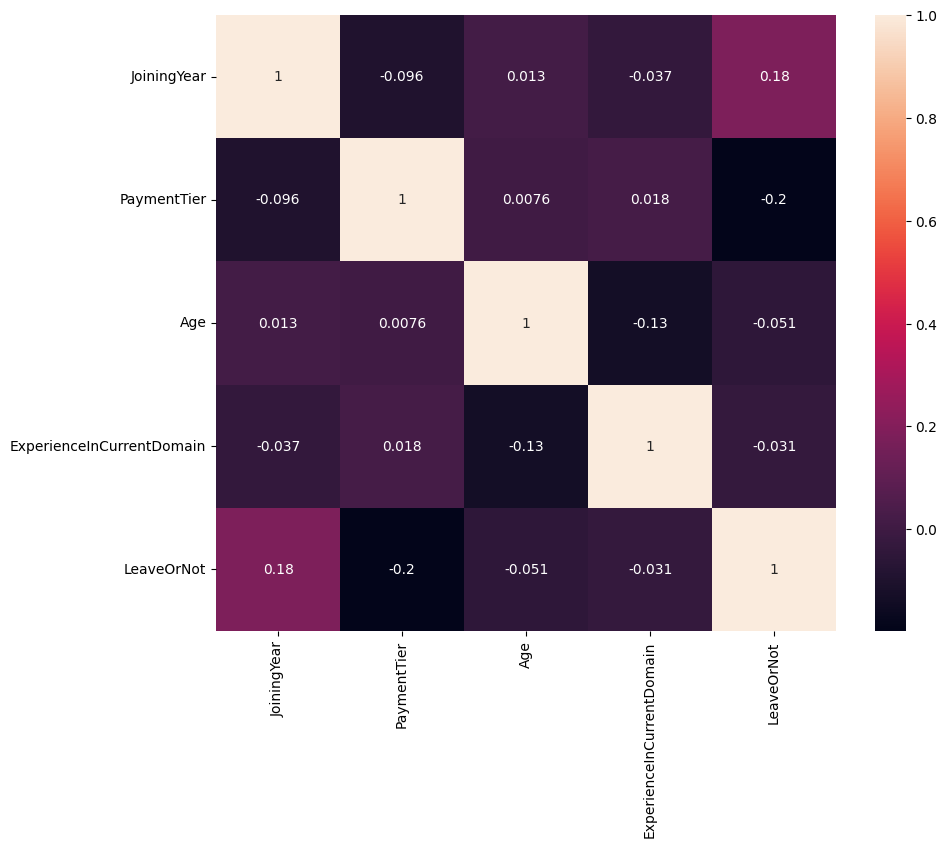

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

##Train Test Split

In [ ]:
X = one_hot_encoded_data.drop('LeaveOrNot', axis=1)
y = one_hot_encoded_data['LeaveOrNot']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
}

grid_search = GridSearchCV(dtree, param_grid, cv=5)

grid_search.fit(X_train, y_train)

#print the best hyper-parameters
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
dtree_param = DecisionTreeClassifier(random_state=12,max_depth=6,min_samples_leaf=4, min_samples_split=2, class_weight="balanced")
dtree_param.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=4,
                       random_state=12)

In [ ]:
y_pred = dtree_param.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.39 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8539205155746509
Precision Score :  0.8539205155746509
Recall Score :  0.8539205155746509
Jaccard Score :  0.7450796626054358
Log Loss :  5.26523830388822


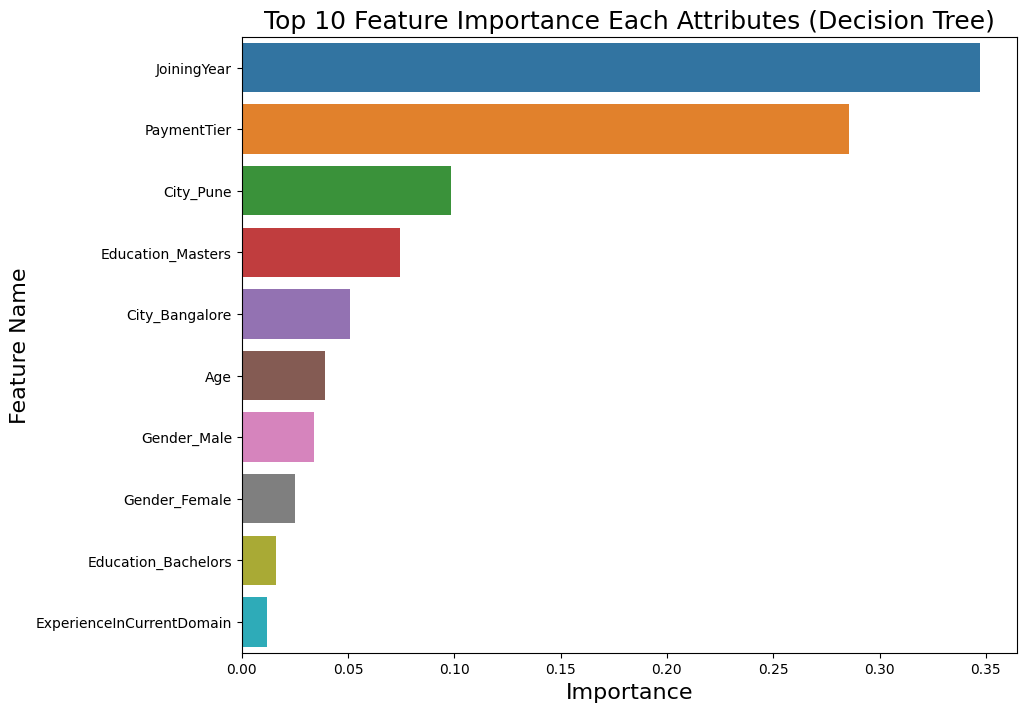

In [29]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree_param.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8539205155746509')

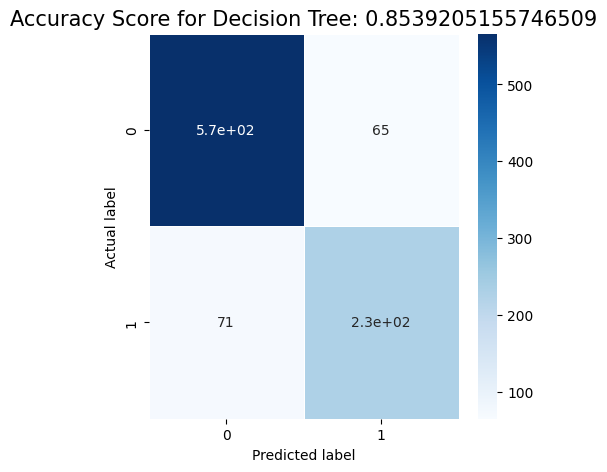

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree_param.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

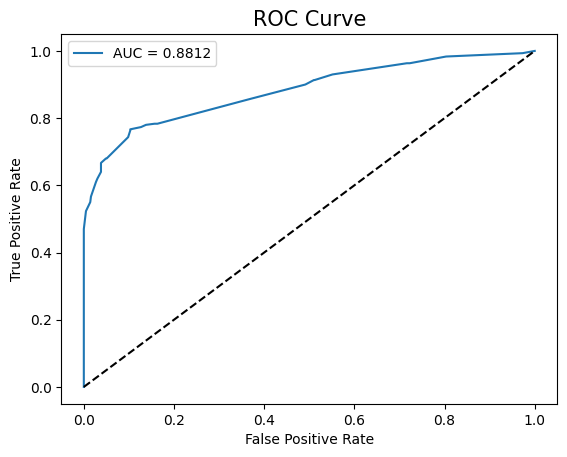

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree_param.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [32]:
rfc = RandomForestClassifier(random_state=12, max_features='sqrt', n_estimators=100, class_weight='balanced', max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=12)

In [33]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 87.54 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8754027926960258
Precision Score :  0.8754027926960258
Recall Score :  0.8754027926960258
Jaccard Score :  0.778414517669532
Log Loss :  4.490938553316423


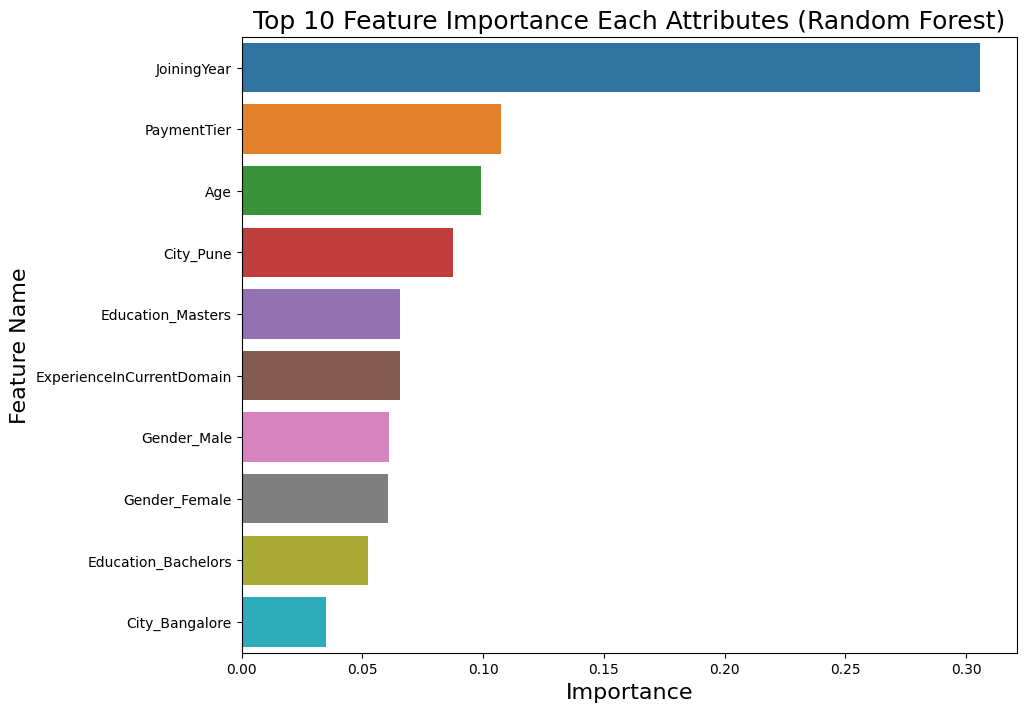

In [36]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8754027926960258')

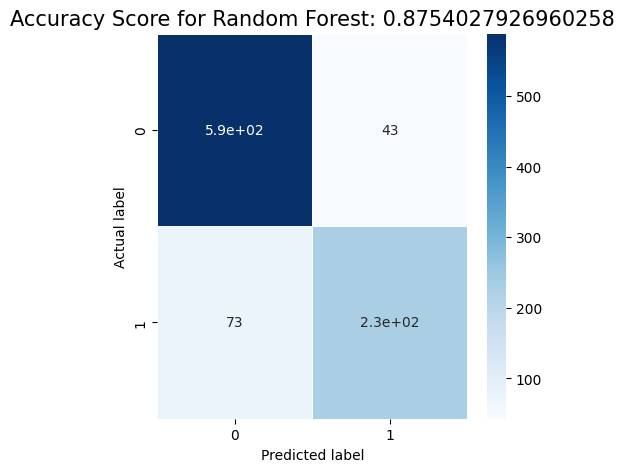

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

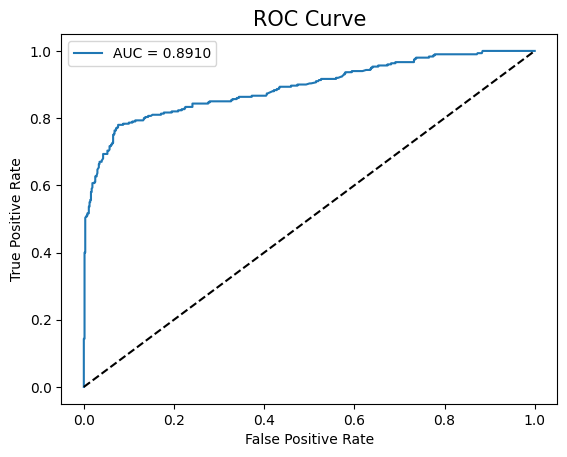

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()